In [1]:
import sympy as sp
import numpy as np
from qutip import *
from mpmath import *
import matplotlib.pyplot as plt
# from scipy.integrate import odeint
from odeintw import odeintw
# from scipy.integrate.odeint import odeintw


In [6]:
# Define the Pauli matrices
sigma_plus = np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

# Define the collapse operator L = sqrt(gamma) * sigma_plus
lam = 0.1
gamma_0 = 0.5

def gam(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-1*l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression


time = np.linspace(0.1, 1000, 20000)  # Adjust time range as needed

# Calculate gam values
gam_vals = np.array([gam(t) for t in time])

# Define the initial density matrix rho(0)

rho0 = 0.5*np.array([[1, 1], [1, 1]], dtype=complex)  # Start in the ground state

psi0 = (basis(2, 0) + basis(2, 1)).unit() 


rho0.reshape((2, 2))

#convert psi0 to a density matrix
# rho0 = ket2dm(psi0)

# rho0 


array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_10956\3526321651.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10956\3526321651.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


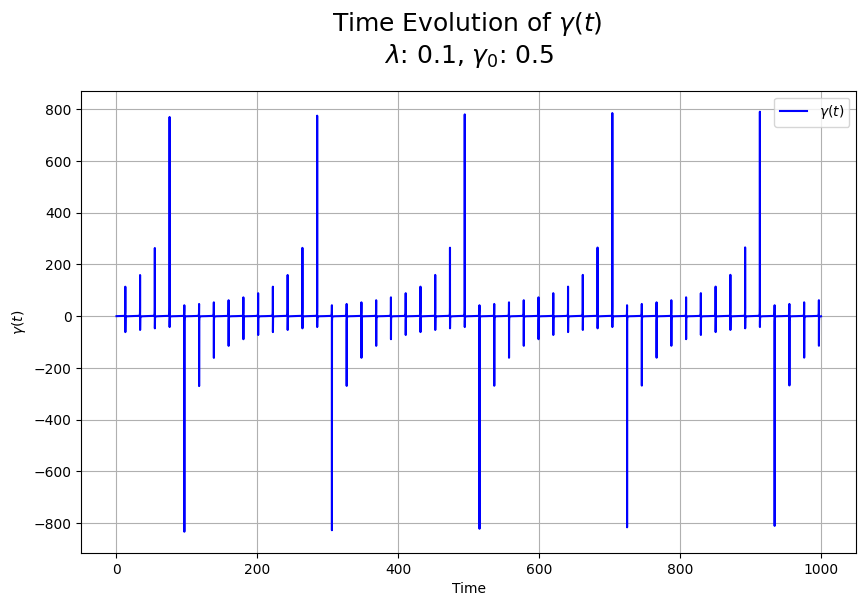

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, gam_vals, label=r'$\gamma(t)$', color='b')
plt.xlabel('Time')
plt.ylabel(r'$\gamma(t)$')
plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
# Define gam(t) (assuming it is defined elsewhere as in the original code)
# Example placeholder:
# def gam(t): return 0.1 * t # Replace with the actual definition

def lindblad_rhs(rho_vec, t):
    """
    Calculates the RHS of the standard Lindblad master equation
    d(rho)/dt = gamma(t) * (L*rho*L_dagger - 0.5*{L_dagger*L, rho})
    assuming H=0.
    """
    rho = rho_vec.reshape((2, 2))

    # Use the provided gam(t) as the rate gamma(t)
    current_gamma = gam(t)
    L = sigma_plus
    L_dagger = L.conj().T
    L_dagger_L = L_dagger @ L # sigma_minus @ sigma_plus

    # Standard Lindblad terms
    term1 = L @ rho @ L_dagger       # L * rho * L_dagger
    term2 = L_dagger_L @ rho         # L_dagger * L * rho
    term3 = rho @ L_dagger_L         # rho * L_dagger * L

    # Combine according to standard Lindblad form with rate current_gamma
    # drho/dt = gamma * (L*rho*L_dagger - 0.5 * (L_dagger*L*rho + rho*L_dagger*L))
    drho_dt = current_gamma * (term1 - 0.5 * (term2 + term3))

    return drho_dt.flatten()

# Example usage with odeintw (assuming times and rho0_vec are defined)
# from odeintw import odeintw
# rho_t_vec_corrected = odeintw(lindblad_rhs_corrected, rho0_vec, times)
# rho_t_corrected = rho_t_vec_corrected.reshape((-1, 2, 2))

<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8944\3364894878.py:28: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8944\3364894878.py:28: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


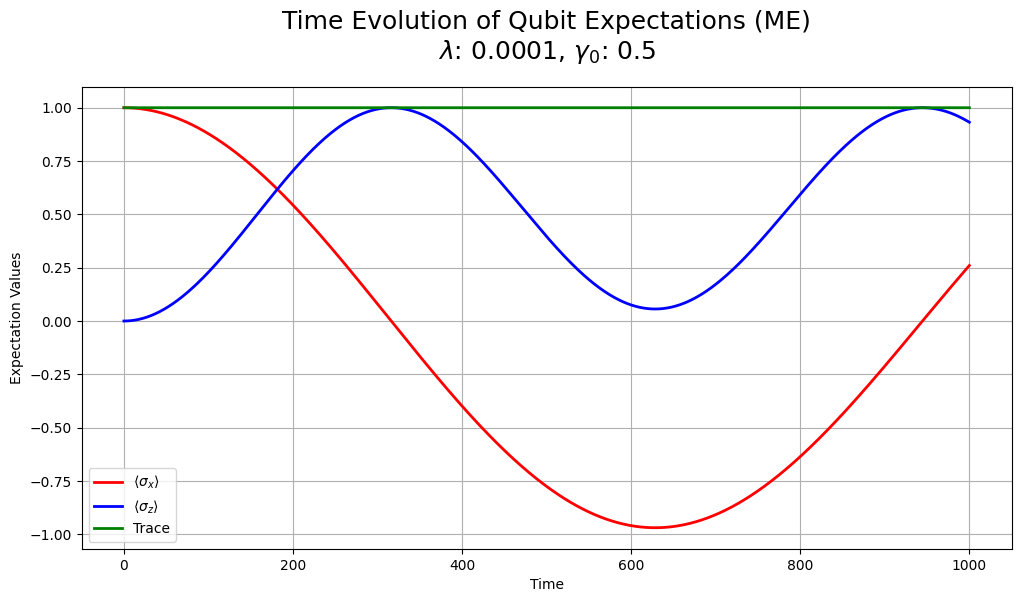

In [6]:
# Function to compute expectation value
def expectation_value(rho, sigma):
    return np.trace(np.matmul(rho,sigma))
# Time points where we want the solution
times = np.linspace(0, 1000, 2000)

# Solve the differential equation using odeintw
rho0_vec = rho0.flatten()  # Flatten the initial density matrix into a vector
# rho_t_vec = odeintw(lindblad_rhs, rho0_vec, times)
rho_t_vec = odeintw(lindblad_rhs, rho0_vec, times)


# Reshape the solution back into matrix form
rho_t = rho_t_vec.reshape((-1, 2, 2))

# Compute expectation values for sigma_x and sigma_z
expect_x = [expectation_value(rho, sigma_x) for rho in rho_t]
expect_z = [expectation_value(rho, sigma_z) for rho in rho_t]
trace = [np.trace(rho) for rho in rho_t]
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times, expect_x, 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(times, expect_z, 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)
ax.plot(times, trace, 'g-', label=r'Trace', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')
ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
ax.legend()
ax.grid(True)
plt.show()





In [35]:
trace = [np.trace(rho) for rho in rho_t]

# trace

<>:72: SyntaxWarning: invalid escape sequence '\l'
<>:72: SyntaxWarning: invalid escape sequence '\g'
<>:72: SyntaxWarning: invalid escape sequence '\l'
<>:72: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18600\3003134005.py:72: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18600\3003134005.py:72: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


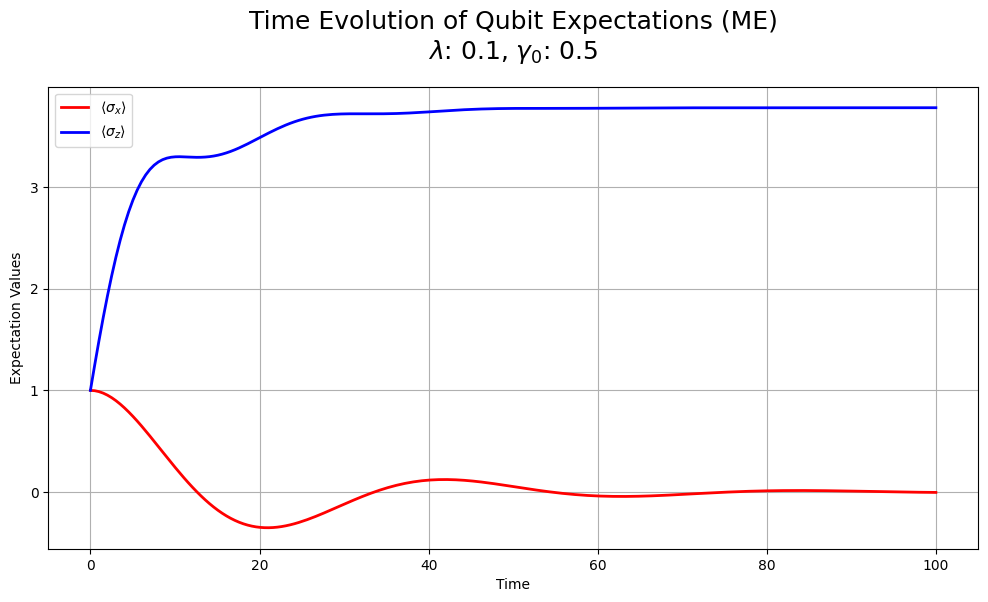

In [36]:
# Define the Pauli matrices
sigma_plus = np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

# Define the collapse operator L = sqrt(gamma) * sigma_plus
lam = 0.1
gamma_0 = 0.5

def gam(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-1*l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression


# Define the initial density matrix rho(0)

rho0 = 0.5*np.array([[1, 1], [1, 1]], dtype=complex)  # Start in the ground state

rho0.reshape((2, 2))


# Define the Lindblad master equation in the form of a differential equation
def lindblad_rhs(rho_vec, t):

    L =  sigma_plus


    # Reshape the vectorized rho back into a matrix
    rho = rho_vec.reshape((2, 2))
    
    # Compute the terms of the master equation
    L_rho_Ldagger = L @ rho @ L.conj().T
    Ldagger_L_rho = L.conj().T @ L @ rho
    rho_Ldagger_L = rho @ L.conj().T @ L
    
    # Compute the time derivative of rho
    drho_dt = L_rho_Ldagger - 0.5 *gam(t)*(Ldagger_L_rho + rho_Ldagger_L)
    
    # Flatten the matrix back into a vector
    return drho_dt.flatten()

# Function to compute expectation value
def expectation_value(rho, sigma):
    return np.trace(np.matmul(rho,sigma))
# Time points where we want the solution
times = np.linspace(0, 100, 200)

# Solve the differential equation using odeintw
rho0_vec = rho0.flatten()  # Flatten the initial density matrix into a vector
rho_t_vec = odeintw(lindblad_rhs, rho0_vec, times)

# Reshape the solution back into matrix form
rho_t = rho_t_vec.reshape((-1, 2, 2))

# Compute expectation values for sigma_x and sigma_z
expect_x = [expectation_value(rho, sigma_x) for rho in rho_t]
expect_z = [expectation_value(rho, sigma_z) for rho in rho_t]
trace = [np.trace(rho) for rho in rho_t]
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times, expect_x, 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(times, trace, 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')
ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
ax.legend()
ax.grid(True)
plt.show()